In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt
from matplotlib.image import imread 
%matplotlib inline
import pandas as pd
import numpy as np
import cv2


In [2]:
#Preprocessing
train_data_generation = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

#preprocessing the training set                                          
training_set = train_data_generation.flow_from_directory('PartA_train&test/train',
                                                         target_size=(64, 64),
                                                         batch_size=32,
                                                         class_mode='binary'
                                                         ,seed=0)

#preprocessing the testing set
test_data_generation = ImageDataGenerator(rescale=1./255)
testing_set = test_data_generation.flow_from_directory('PartA_train&test/test',
                                                       target_size=(64, 64),
                                                       batch_size=32,
                                                       class_mode='binary',seed=0)

train_data_notAUG_gen= ImageDataGenerator(rescale=1./255)
train_data_notAUG = train_data_notAUG_gen.flow_from_directory('PartA_train&test/train',
                                                         target_size=(64, 64),
                                                         batch_size=32,
                                                       class_mode='binary',seed=0)

img,label=train_data_notAUG.next()
print(label)
img,label=training_set.next()
label

Found 1342 images belonging to 2 classes.
Found 333 images belonging to 2 classes.
Found 1342 images belonging to 2 classes.
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0.]


array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

In [3]:
test4prediction = train_data_notAUG_gen.flow_from_directory('/home/aya/Aya/GP/Data Set/test4prediction',
                                                         target_size=(64, 64),
                                                         batch_size=32,
                                                       class_mode='binary',seed=0)

Found 10 images belonging to 1 classes.


In [56]:
#creating the convolutional neural network layers

model = Sequential([

    # adding the first layer
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
    MaxPool2D(pool_size=2, strides=2),

    # adding the second layer
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    # adding the third layer
    Flatten(),

    # full connection
    Dense(units=128, activation='relu'),

    # output layer
    Dense(units=2, activation='sigmoid')

])

In [57]:
# let's look at the structure of the model we just created
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [58]:
# compiling the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [59]:
#fitting the model
model.fit(x=train_data_notAUG, validation_data=testing_set, epochs=30)

Epoch 1/30
42/42 [==============================] - 8s 163ms/step - loss: 0.6882 - accuracy: 0.6188 - val_loss: 0.4468 - val_accuracy: 0.8078
Epoch 2/30
42/42 [==============================] - 8s 185ms/step - loss: 0.5141 - accuracy: 0.7550 - val_loss: 0.4057 - val_accuracy: 0.8018
Epoch 3/30
42/42 [==============================] - 7s 173ms/step - loss: 0.4391 - accuracy: 0.7990 - val_loss: 0.5133 - val_accuracy: 0.6547
Epoch 4/30
42/42 [==============================] - 8s 187ms/step - loss: 0.4471 - accuracy: 0.7716 - val_loss: 0.4159 - val_accuracy: 0.8138
Epoch 5/30
42/42 [==============================] - 7s 176ms/step - loss: 0.4397 - accuracy: 0.7900 - val_loss: 0.3560 - val_accuracy: 0.8438
Epoch 6/30
42/42 [==============================] - 8s 189ms/step - loss: 0.4004 - accuracy: 0.8112 - val_loss: 0.3406 - val_accuracy: 0.8529
Epoch 7/30
42/42 [==============================] - 8s 194ms/step - loss: 0.3901 - accuracy: 0.8163 - val_loss: 0.3686 - val_accuracy: 0.8198
Epoch 

In [61]:
#saving the model
model.save('DFU.h5')

In [62]:
cnn = load_model('DFU.h5')

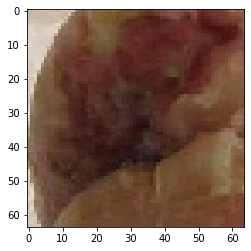

In [67]:
image = load_img('test4prediction/3.08_160.jpg', target_size=(64, 64))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [7]:
result = cnn.predict(image)

result


NameError: name 'cnn' is not defined